<a href="https://colab.research.google.com/github/MasterVvisput/Learning-with-a-teacher/blob/master/%D0%A1%D0%BE%D1%80%D0%B5%D0%B2%D0%BD%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music genre prediction [M1_25DS+]

**Описание задачи**

Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса "МиФаСоль". Сервис расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача -- правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. Ваши коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. Ваша задача -- разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

**В ходе работы в пройдете все основные этапы полноценного исследования:**

1. загрузка и ознакомление с данными,
2. предварительная обработка,
3. полноценный разведочный анализ,
4. разработка новых синтетических признаков,
5. проверка на мультиколлинеарность,
6. отбор финального набора обучающих признаков,
7. выбор и обучение моделей,
8. итоговая оценка качества предсказания лучшей модели,
9. анализ важности ее признаков.

#**Данные**

train.csv - информация (~20000) музыкальных треках, которые будут использоваться в качестве обучающих данных.

test.csv - информация (~5000) музыкальных треках, которые будут использоваться в качестве тестовых данных. Ваша задача - предсказать значение 'music_genre' для каждого трека из этого датасета.

sample_submit.csv - файл предсказаний в правильном формате.

instance_id - идентификатор трека в тестовом наборе.

music_genre - Целевой признак. Для каждого трека предскажите категориальное значение соответствующее музыкальному жанру трека.

#**Описание полей данных**

**instance_id** -Уникальный идентификатор трека

**track_name** - Название трека

**acousticness** - Мера уверенности от 0,0 до 1,0 в том, что трек является акустическим. 1,0 означает высокую степень уверенности в том, что трек является акустическим.

**danceability** - Танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу ударов и общую регулярность. Значение 0,0 означает наименьшую танцевальность, а 1,0 - наибольшую танцевальность.

**duration_ms** - Продолжительность трека в миллисекундах.

**energy** - Энергия это показатель от 0,0 до 1,0, представляющий собой меру интенсивности и активности. Как правило, энергичные композиции ощущаются как быстрые, громкие и шумные. Например, дэт-метал обладает высокой энергией, в то время как прелюдия Баха имеет низкую оценку этого параметра

**instrumentalness** - Определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в данном контексте рассматриваются как инструментальные. Рэп или разговорные треки явно являются "вокальными". Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокала

**key** - базовый ключ (нота) произведения

**liveness** - Определяет присутствие аудитории в записи. Более высокие значения liveness означают увеличение вероятности того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек исполняется вживую

**loudness** - Общая громкость трека в децибелах (дБ)

**mode** - Указывает на модальность (мажорную или минорную) трека

**speechiness** - Речевой характер определяет наличие в треке разговорной речи. Чем более исключительно речевой характер носит запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1,0. Значения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи. Значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки.

**tempo** - Темп трека в ударах в минуту (BPM). В музыкальной терминологии темп представляет собой скорость или темп данного произведения и напрямую зависит от средней продолжительности тактов

**obtained_date** - дата загрузки в сервис

**valence** - Показатель от 0,0 до 1,0, характеризующий музыкальный позитив, передаваемый треком. Композиции с высокой валентностью звучат более позитивно (например, радостно, весело, эйфорично), а композиции с низкой валентностью - более негативно (например, грустно, депрессивно, сердито)

**music_genre** - Музыкальный жанр трека

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier

# Обзор данных

## Загрузка данных

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/kaggle_music_genre_train.csv')
data.head().T
print(f'{data.shape[0]} наблюдений и {data.shape[1]} колонок в датасете')
data.head().T

20394 наблюдений и 16 колонок в датасете


,0,1,2,3,4
instance_id,"25,143.00","26,091.00","87,888.00","77,021.00","20,852.00"
track_name,Highwayman,Toes Across The Floor,First Person on Earth,No Te Veo - Digital Single,Chasing Shadows
acousticness,0.48,0.24,0.23,0.06,0.23
danceability,0.67,0.45,0.45,0.85,0.74
duration_ms,"182,653.00","187,133.00","173,448.00","255,987.00","195,333.00"
energy,0.35,0.67,0.80,0.87,0.57
instrumentalness,0.02,0.00,0.00,0.00,0.00
key,D,A,E,G#,C
liveness,0.12,0.11,0.18,0.33,0.18
loudness,-16.84,-8.39,-5.22,-4.80,-5.55


In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/kaggle_music_genre_test.csv')
data_test.head().T
print(f'{data_test.shape[0]} наблюдений и {data_test.shape[1]} колонок в датасете')
data_test.head().T

5099 наблюдений и 15 колонок в датасете


,0,1,2,3,4
instance_id,48564,72394,88081,78331,72636
track_name,Low Class Conspiracy,The Hunter,Hate Me Now,Somebody Ain't You,Sour Mango
acousticness,0.30,0.54,0.01,0.02,0.00
danceability,0.76,0.26,0.68,0.59,0.42
duration_ms,"146,213.00","240,360.00","284,000.00","177,354.00",-1.00
energy,0.68,0.52,0.77,0.75,0.45
instrumentalness,0.00,0.01,0.00,0.00,0.01
key,A#,G#,A,B,D
liveness,0.30,0.08,0.11,0.12,0.04
loudness,-7.14,-5.17,-4.40,-4.60,-8.83


In [ ]:
# нужно выделить этот столбез для крезультирующего датафрейма, пока от этих данных
# не избавились
instance_id = data_test['instance_id']

## Сводная статистика числовых переменных

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
def summary(df):
    num_cols = df.select_dtypes(include=['float64','int64'])
    summ = pd.DataFrame(num_cols.dtypes, columns=['data type'])
    summ['#missing'] = num_cols.isnull().sum().values
    summ['%missing'] = num_cols.isnull().sum().values / len(df) * 100
    summ['#nunique'] = num_cols.nunique().values
    desc = pd.DataFrame(num_cols.describe(include='number').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['average'] = desc['mean'].values
    summ['standard_deviation'] = desc['std'].values
    summ['first value'] = num_cols.loc[0].values
    summ['second value'] = num_cols.loc[1].values
    summ['third value'] = num_cols.loc[2].values

    return summ
summary(data.drop(['instance_id'], axis=1))

,data type,#missing,%missing,#nunique,min,max,average,standard_deviation,first value,second value,third value
acousticness,float64,0,0.00,3616,0.00,1.00,0.27,0.32,0.48,0.24,0.23
danceability,float64,0,0.00,950,0.06,0.98,0.56,0.17,0.67,0.45,0.45
duration_ms,float64,0,0.00,13649,-1.00,"4,497,994.00","220,375.43","126,728.33","182,653.00","187,133.00","173,448.00"
energy,float64,0,0.00,1521,0.00,1.00,0.63,0.25,0.35,0.67,0.80
instrumentalness,float64,0,0.00,4360,0.00,1.00,0.16,0.31,0.02,0.00,0.00
liveness,float64,0,0.00,1521,0.01,1.00,0.20,0.17,0.12,0.11,0.18
loudness,float64,0,0.00,10844,-44.41,3.74,-8.55,5.50,-16.84,-8.39,-5.22
speechiness,float64,0,0.00,1243,0.02,0.94,0.09,0.10,0.05,0.04,0.37
tempo,float64,442,2.17,15762,34.77,220.04,120.94,30.43,101.38,113.07,80.98
valence,float64,0,0.00,1454,0.00,0.99,0.46,0.24,0.45,0.54,0.34


- часть данных признака tempo пропущена, эти наблюдения должны быть удалены
- оказалось, что в тестовом датафрейме тоже есть пропуски и у него строки удалятьнелья, согласно правилам совревнования. Значит будут удалены все столбцы с пропусками

## Сводная статистика категориальных переменных

In [ ]:
data.select_dtypes(include=['object', 'bool']).describe().T

,count,unique,top,freq
track_name,20394,18643,Home,11
key,19659,12,G,2304
mode,19888,2,Major,12828
obtained_date,20394,4,4-Apr,18435
music_genre,20394,10,Blues,2858


- признак obtained_date имет тип данных object нужно преобразовать его в формат даты, если будем его использовать

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
def summary_cat(df):
    num_cols = df.select_dtypes(include=['object','bool'])
    summ = pd.DataFrame(num_cols.dtypes, columns=['data type'])
    summ['#missing'] = num_cols.isnull().sum().values
    summ['%missing'] = num_cols.isnull().sum().values / len(df) * 100
    return summ
summary_cat(data)

,data type,#missing,%missing
track_name,object,0,0.00
key,object,735,3.60
mode,object,506,2.48
obtained_date,object,0,0.00
music_genre,object,0,0.00


- признаки key и mode имеют пропуски, но важны для исследования. Пропуски заполнить нечем, поэтому наблюдения придётся удалить

# Очистка данных

## Удалить ненужные данные

Категориальные признаки 'instance_id', 'obtained_date', 'track_name' не содержат никакой информации о жанре, поэтому являются ненужными.

In [ ]:
data.drop(columns=['instance_id','track_name', 'obtained_date',
                   'duration_ms', 'key', 'mode', 'tempo'],inplace=True)

In [ ]:
data_test.drop(columns=['instance_id', 'track_name', 'obtained_date',
                        'duration_ms', 'key', 'mode', 'tempo'],inplace=True)

### Недостающие данные

In [ ]:
print(f'Недостающих данных {data.isna().sum().sum()}')

Недостающих данных 0


- недостающих данных достаточно много, но мне нечем их заполнить. Поэтому объекты с недостающими данными будут удалены.

In [ ]:
temp_df = data.copy()

In [ ]:
print(f'{temp_df.shape[0]} наблюдений и {temp_df.shape[1]} признаков в датасете')

20394 наблюдений и 9 признаков в датасете


In [ ]:
data = data.dropna(axis=0)

In [ ]:
print(f'{data.shape[0]} наблюдений и {data.shape[1]} признаков в датасете')

20394 наблюдений и 9 признаков в датасете


## Дубли

In [ ]:
print(f'Дублей в датасете: {data.duplicated().sum()}')

Дублей в датасете: 7


In [ ]:
data.drop_duplicates(inplace=True)
data = data.copy()

In [ ]:
print(f'{data.shape[0]} наблюдений и {data.shape[1]} признаков в датасете')

20387 наблюдений и 9 признаков в датасете


## Выбросы

In [ ]:
from scipy import stats
import numpy as np

num_outliner = []
num_cols = data.select_dtypes(include=['float64', 'int64'])
print(f'{data.shape[0]} признаков до удаления выбросов\n')

for column in num_cols.columns:
  z = np.abs(stats.zscore(data[column]))

  threshold = 3
  outliners = data[z > threshold]
  num_outliner.append(len(outliners))
  data.drop(outliners.index, inplace=True)

print(f'{data.shape[0]} признаков после удаления выбросов\n')
df_outliner = pd.DataFrame({'column':num_cols.columns, 'number_of_outliners':num_outliner})
df_outliner

20387 признаков до удаления выбросов

18896 признаков после удаления выбросов



,column,number_of_outliners
0,acousticness,0
1,danceability,0
2,energy,0
3,instrumentalness,0
4,liveness,561
5,loudness,481
6,speechiness,449
7,valence,0


# Исследовательский анализ данных

## Основные статистические показатели

In [ ]:
data.select_dtypes(include=['float64', 'int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
acousticness,"18,896.00",0.26,0.31,0.00,0.01,0.11,0.43,1.00
danceability,"18,896.00",0.57,0.17,0.06,0.46,0.58,0.69,0.97
energy,"18,896.00",0.64,0.24,0.00,0.48,0.67,0.83,1.00
instrumentalness,"18,896.00",0.15,0.30,0.00,0.00,0.00,0.06,1.00
liveness,"18,896.00",0.18,0.13,0.01,0.10,0.13,0.24,0.70
loudness,"18,896.00",-8.03,4.42,-25.09,-9.94,-6.91,-5.00,3.74
speechiness,"18,896.00",0.08,0.08,0.02,0.04,0.05,0.09,0.38
valence,"18,896.00",0.47,0.24,0.03,0.28,0.47,0.66,0.99


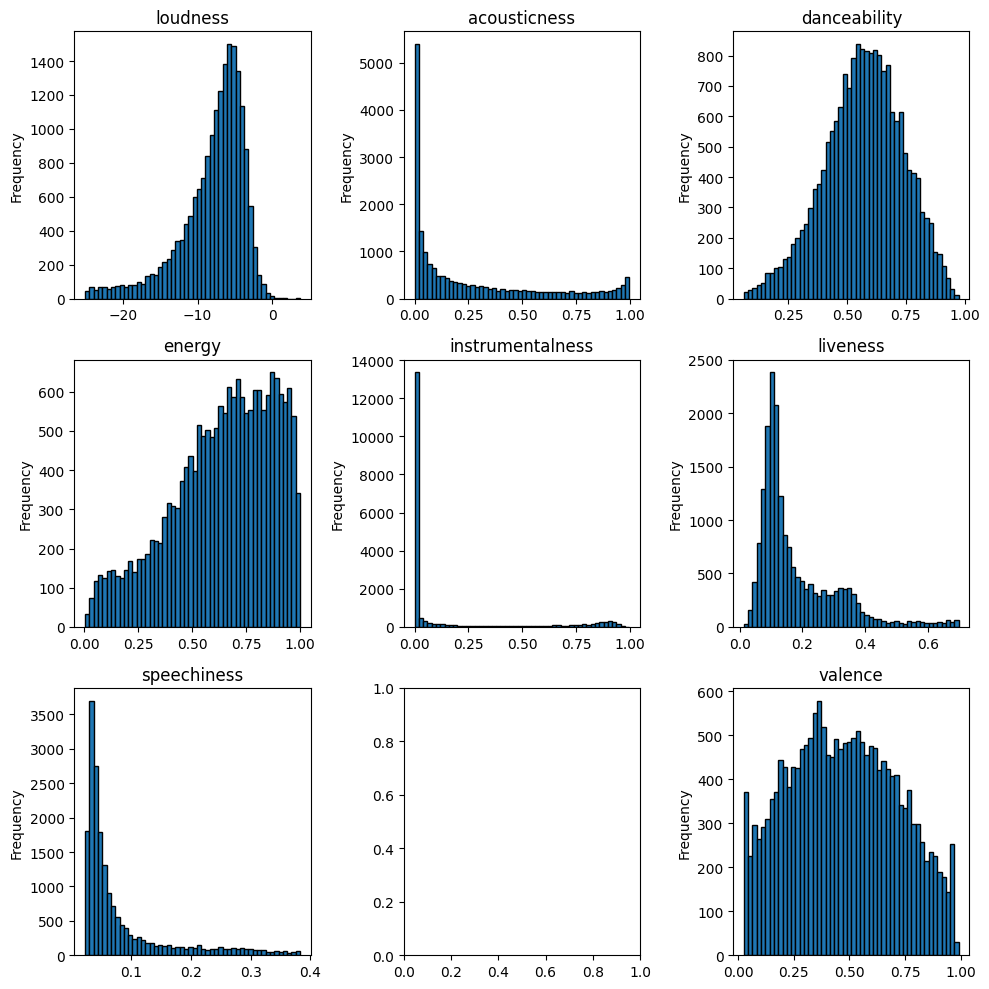

In [ ]:
fig,ax = plt.subplots(nrows=3, ncols=3, figsize=(10,10), tight_layout=1)

data['loudness'].plot.hist(bins=50, edgecolor = 'black',ax=ax[0][0])
ax[0][0].set_title('loudness')
data['acousticness'].plot.hist(bins=50, edgecolor = 'black',ax=ax[0][1])
ax[0][1].set_title('acousticness')
data['danceability'].plot.hist(bins=50, edgecolor = 'black',ax=ax[0][2])
ax[0][2].set_title('danceability')
data['energy'].plot.hist(bins=50, edgecolor = 'black',ax=ax[1][0])
ax[1][0].set_title('energy')
data['instrumentalness'].plot.hist(bins=50, edgecolor = 'black',ax=ax[1][1])
ax[1][1].set_title('instrumentalness')
data['liveness'].plot.hist(bins=50, edgecolor = 'black',ax=ax[1][2])
ax[1][2].set_title('liveness')
data['speechiness'].plot.hist(bins=50, edgecolor = 'black',ax=ax[2][0])
ax[2][0].set_title('speechiness')
data['valence'].plot.hist(bins=50, edgecolor = 'black',ax=ax[2][2])
ax[2][2].set_title('valence');

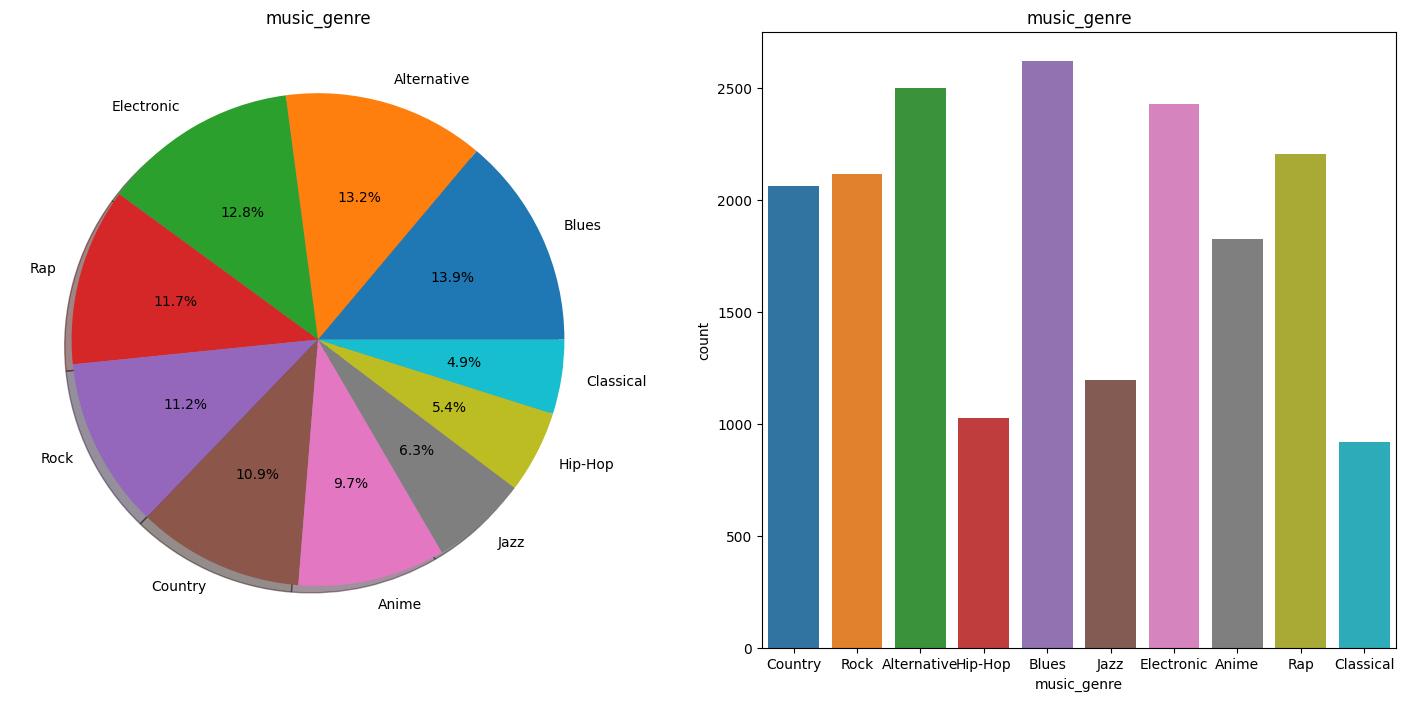

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['music_genre'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('music_genre')
ax[0].set_ylabel('')
sns.countplot(x='music_genre',data=data,ax=ax[1])
ax[1].set_title('music_genre')
plt.show()

- Все классы представлены сбалансированно, кроме классов 'Jazz', 'Hip-Hop', 'Classical'

### Корреляция данных

In [ ]:
!pip install phik

In [ ]:
import phik

In [ ]:
data.phik_matrix()

interval columns not set, guessing: ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,music_genre
acousticness,1.00,0.41,0.75,0.37,0.20,0.69,0.26,0.33,0.62
danceability,0.41,1.00,0.46,0.30,0.12,0.42,0.36,0.49,0.60
energy,0.75,0.46,1.00,0.35,0.27,0.83,0.35,0.42,0.62
instrumentalness,0.37,0.30,0.35,1.00,0.12,0.45,0.19,0.31,0.54
liveness,0.20,0.12,0.27,0.12,1.00,0.20,0.15,0.19,0.14
loudness,0.69,0.42,0.83,0.45,0.20,1.00,0.28,0.36,0.65
speechiness,0.26,0.36,0.35,0.19,0.15,0.28,1.00,0.14,0.52
valence,0.33,0.49,0.42,0.31,0.19,0.36,0.14,1.00,0.41
music_genre,0.62,0.60,0.62,0.54,0.14,0.65,0.52,0.41,1.00


interval columns not set, guessing: ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']


<Axes: >

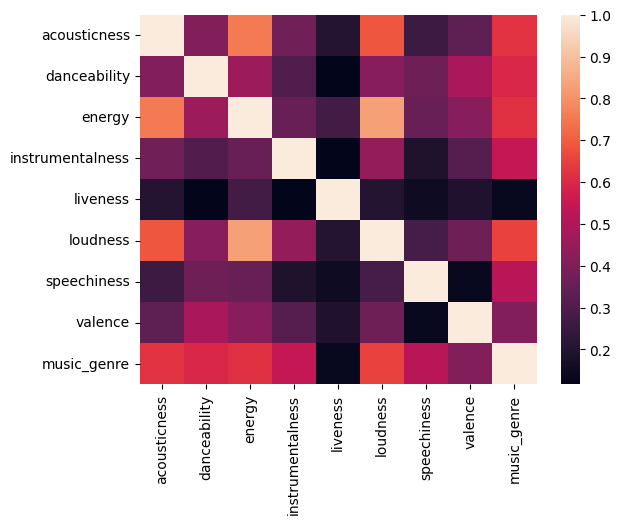

In [ ]:
sns.heatmap(data = data.phik_matrix())

- есть значимая  корреляция между признаками energy и loudness
- значимая корреляция между признаками energy и acousticness, loudness и acousticness

Таким образом, признаки 'energy', 'acousticness' являются лишними, от них следует избавиться

In [ ]:
data.drop(columns=['energy', 'acousticness'], inplace=True)

# Моделирование

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline

## Подготовить тренировочные и тестовые выборки

In [ ]:
X_train = data.drop(columns=['music_genre'])
y_train = data.music_genre

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                     test_size=0.3, random_state=42)

## Подготовка трансформера

In [ ]:
column_transformer = make_column_transformer((StandardScaler(with_mean=False), make_column_selector(dtype_include=['float64', 'int64'])),
                                             (OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist'), make_column_selector(dtype_include='object')),
                                              remainder='passthrough')
column_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler',
                                 StandardScaler(with_mean=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7b2aa1aefcd0>),
                                ('onehotencoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='infrequent_if_exist'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7b2aa1aecdc0>)])

## Тестирование моделей

### DecisionTreeClassifier

In [ ]:
model_dtc = DecisionTreeClassifier(random_state=42)
pipline_dtc = make_pipeline(column_transformer, model_dtc)
pipline_dtc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(with_mean=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b2aa1aefcd0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b2aa1aecdc0>)])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [ ]:
pipline_dtc.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('standardscaler',
                                  StandardScaler(with_mean=False),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b2aa1aefcd0>),
                                 ('onehotencoder',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='infrequent_if_exist'),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b2aa1aecdc0>)]),
 'decisiontreeclassifier': DecisionTreeClassifier(random_state=42)}

In [ ]:
params_dtc = {
          'columntransformer__standardscaler': [StandardScaler()],
          'decisiontreeclassifier__max_depth':range(1,25,1),
          'decisiontreeclassifier__criterion': ['gini'],
          'decisiontreeclassifier__class_weight': ['balanced'],
          'decisiontreeclassifier__splitter': ['random']

         }

grid_dtc = GridSearchCV(pipline_dtc, params_dtc, cv=5, scoring='f1_micro')
grid_dtc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(with_mean=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7b2aa1aefcd0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='infrequent_if_exist'),
                                                                         <sklearn.compos...)),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'columntransformer__standardscaler': [StandardScaler()],
                         'decisiontreeclassifier__class_weight': ['balanced'],
                         'decisiontreeclassifier__criterion': ['gini'],
                         'decisiontreeclassifier__max_depth': range(1, 25),
                         'decisiontreeclassifier__splitter': ['random']},
             scoring='f1_micro')

In [ ]:
pred = grid_dtc.predict(X_test)
pred

array(['Blues', 'Alternative', 'Blues', ..., 'Hip-Hop', 'Country',
       'Alternative'], dtype=object)

In [ ]:
f1_score(y_test, pred, average='micro')

0.3254542247309931

### RandomForestClassifier

In [ ]:
model_rfc = RandomForestClassifier(random_state=42)
pipline_rfc = make_pipeline(column_transformer, model_rfc)
pipline_rfc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(with_mean=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b2aa1aefcd0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b2aa1aecdc0>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
params_rfc = {
          'columntransformer__standardscaler': [StandardScaler(with_mean=False)],
          'randomforestclassifier__max_depth':range(2, 6),
          'randomforestclassifier__n_estimators':range(100, 200, 20),
          'randomforestclassifier__class_weight': ['balanced']

         }


In [ ]:
grid_rfc = GridSearchCV(pipline_rfc, params_rfc, cv=5, scoring='f1_micro')
grid_rfc.fit(X_train, y_train, )
pred_rfc = grid_rfc.predict(X_test)
f1_score(y_test, pred_rfc, average='micro')

0.35014993826071616

### CatBoostClassifier

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5,
    learning_rate=0.1,
    #loss_function='CrossEntropy'
)


In [ ]:
from catboost import CatBoostClassifier

model_clf = CatBoostClassifier(random_state=42)
pipline_clf = make_pipeline(column_transformer, model_clf)
pipline_clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(with_mean=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b2aa1aefcd0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b2aa1aecdc0>)])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x7b2aa1aee290>)])

In [ ]:
params_clf = {
          'columntransformer__standardscaler': [StandardScaler(with_mean=False)],
          'catboostclassifier__iterations':[5],
          'catboostclassifier__learning_rate':[0.1]
         }

In [ ]:
grid_clf= GridSearchCV(pipline_clf, params_clf, cv=5, scoring='f1_micro')
grid_clf.fit(X_train, y_train, )
pred_clf = grid_clf.predict(X_test)
f1_score(y_test, pred_clf, average='micro')

## Выбор лучшей модели

In [ ]:
cv_scores_dtc = cross_val_score(grid_dtc, X_train, y_train, cv=5, scoring='f1_micro')
cv_scores_dtc


array([0.31519274, 0.31179138, 0.30396975, 0.31833648, 0.30434783])

In [191]:
print(f'Средняя проверки методом кросвалидация: {cv_scores_dtc.mean():.2f},'
f'ст.отклонение: {cv_scores_dtc.std():.2f}')

Средняя проверки методом кросвалидация: 0.31,ст.отклонение: 0.01


In [ ]:
cv_scores_rfc = cross_val_score(grid_rfc, X_train, y_train, cv=5, scoring='f1_micro')
cv_scores_rfc

array([0.33484505, 0.34845049, 0.33194707, 0.35047259, 0.34782609])

In [192]:
print(f'Средняя проверки методом кросвалидация: {cv_scores_rfc.mean():.2f},'
f'ст.отклонение: {cv_scores_rfc.std():.2f}')

Средняя проверки методом кросвалидация: 0.34,ст.отклонение: 0.01


In [ ]:
cv_scores_clf = cross_val_score(grid_clf, X_train, y_train, cv=5, scoring='f1_micro')
cv_scores_clf

In [193]:
print(f'Средняя проверки методом кросвалидация: {cv_scores_clf.mean():.2f},'
f'ст.отклонение: {cv_scores_clf.std():.2f}')

Средняя проверки методом кросвалидация: 0.38,ст.отклонение: 0.00


- таким образом для решения нашей задачи лучшей моделью из исследуемых является CatBoostClassifier

### Формирование итогового предсказания

In [ ]:
pred = grid_clf.predict(data_test)
pred = pd.Series(pred.reshape((pred.shape[0],)))
pred

0               Rap
1       Alternative
2               Rap
3           Country
4       Alternative
           ...     
5094        Country
5095            Rap
5096            Rap
5097     Electronic
5098          Blues
Length: 5099, dtype: object

In [ ]:
source_data = {'instance_id': instance_id, 'music_genre':pred}
answer = pd.DataFrame(source_data)
answer.to_csv('answer.csv', index=False)
answer

,instance_id,music_genre
0,48564,Rap
1,72394,Alternative
2,88081,Rap
3,78331,Country
4,72636,Alternative
...,...,...
5094,50532,Country
5095,26255,Rap
5096,67924,Rap
5097,79778,Electronic


### Оценка важности признаков

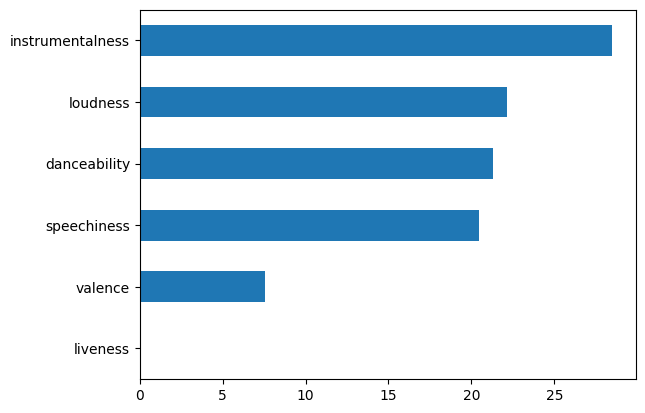

In [ ]:
_ = pd.Series(grid_clf.best_estimator_[1].feature_importances_,
              index=grid_clf.feature_names_in_).sort_values().plot(kind='barh')

- из графика видно, что для нашей модели на первом месте по важнорсти является признак instrumentalness

# Выводы

Таким образом, мы убедились, что по классификация жанров музыки по некоторым аудиопараметрам возможна. Однако, построенная нами модель не обладает достаточной прогностической возможностью для внедрение в эксплуотацию.

Идеи по улучшению:
- провести более качественную предварительную обработку данных. Возможно были найдены и учтены не все артефакты датасетов
- выполнить более тщательный анализ корреляции признаков и учестих в обучении моделей
- стоит поэксперементировать с иным методом работы с пропусками, нежели удаления данных с пропосками
